In [15]:
import torch
from torch import nn
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [16]:
model = nn.Sequential(
    nn.Conv2d(3, 5, 3),
    nn.BatchNorm2d(5, affine= False),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Softmax2d()
)
for param in model.parameters():
    param.requires_grad = False

In [17]:
model

Sequential(
  (0): Conv2d(3, 5, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Softmax2d()
)

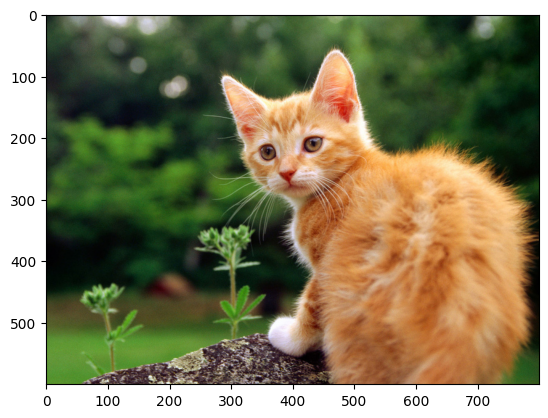

In [20]:
img = cv2.imread('kitty.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

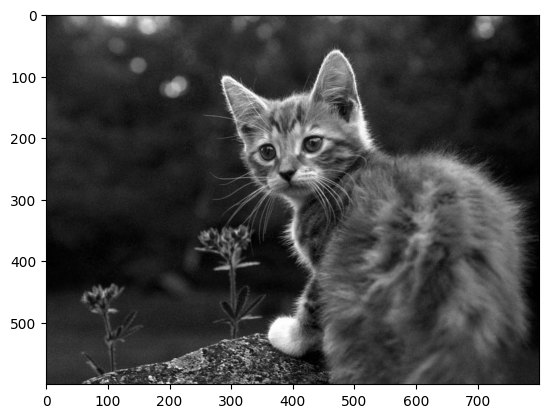

In [21]:
img_new_layout = np.array([img[:,:,i] for i in range(3)])
img_new_layout = img_new_layout.reshape((1,) + img_new_layout.shape)
plt.imshow(cv2.cvtColor(img_new_layout[0,0], cv2.COLOR_BGR2RGB))

In [23]:
inp = torch.from_numpy(img_new_layout.astype(float)).double()
model.double().eval()
out = model(inp)
out.shape

torch.Size([1, 5, 299, 399])

In [24]:
out

tensor([[[[8.0321e-06, 1.3500e-07, 1.1661e-06,  ..., 2.8447e-04,
           7.0833e-06, 4.7803e-08],
          [2.4285e-06, 6.3712e-07, 6.1636e-05,  ..., 3.6462e-05,
           2.2998e-06, 3.1856e-09],
          [1.1392e-05, 7.9039e-07, 7.6210e-06,  ..., 1.1287e-03,
           2.3192e-05, 1.0890e-06],
          ...,
          [5.4888e-20, 2.2775e-20, 5.7302e-22,  ..., 4.5014e-12,
           1.6005e-11, 1.9314e-12],
          [7.7911e-22, 5.2581e-20, 2.3956e-20,  ..., 1.3839e-12,
           1.4612e-11, 3.0061e-11],
          [3.6799e-22, 4.0598e-21, 3.0258e-21,  ..., 3.8108e-12,
           3.3562e-12, 3.9073e-12]],

         [[3.1360e-09, 1.9290e-09, 4.9736e-09,  ..., 1.2460e-07,
           1.4449e-08, 7.2270e-10],
          [1.4388e-09, 6.2617e-09, 3.0901e-08,  ..., 6.0068e-08,
           6.0176e-09, 1.0847e-10],
          [1.6083e-09, 4.3913e-09, 3.0293e-08,  ..., 1.9181e-07,
           1.9395e-08, 1.1513e-09],
          ...,
          [1.0166e-23, 4.9262e-24, 7.4463e-25,  ..., 2.8376